# Homework 2-3 Part (d)
Prepared with Ceren Demirkol, Okan Güven, Sevgican Varol

In [60]:
require(data.table)
library(glmnet)
set.seed(123)

In [61]:
#Getting data
consumption=fread("C:/Users/ceren.orhan/Desktop/ETM 58D/HW2-3/GercekZamanliTuketim-01012016-19052020.csv")

setnames(consumption,names(consumption)[3],'value')
consumption[,date:=as.Date(Tarih,'%d.%m.%Y')]
consumption[,hour:=as.numeric(substr(Saat,1,2))]
consumption=consumption[,list(date,hour,value)]
consumption[,value:=gsub(".", "",value, fixed = TRUE)]
consumption[,value:=as.numeric(gsub(",", ".",value, fixed = TRUE))]

consumption[,lag_168:=shift(value,168)]
consumption[,lag_48:=shift(value,48)]

full_consumption=consumption[complete.cases(consumption)]
head(full_consumption)

date,hour,value,lag_168,lag_48
2016-01-08,0,28602.02,26277.24,29189.27
2016-01-08,1,27112.37,24991.82,27614.02
2016-01-08,2,25975.34,23532.61,26578.97
2016-01-08,3,25315.55,22464.78,25719.19
2016-01-08,4,25128.15,22002.91,25864.63
2016-01-08,5,25356.22,21957.08,25918.59


In [62]:
# Filter consumption data in long format
long_tr = full_consumption[date < '2020-03-01']
long_te = full_consumption[date >= '2020-03-01']

# Create training and test consumption data in wide format with lag_168
wide_pen_tr = merge(dcast(long_tr, date~paste0('lag_48_hour_', hour), value.var='lag_48'), dcast(long_tr, date~paste0('lag_168_hour_', hour), value.var='lag_168'), by = 'date')
wide_pen_tr_ac = dcast(long_tr, date~paste0('actual_', hour), value.var='value')
wide_pen_te = merge(dcast(long_te, date~paste0('lag_48_hour_', hour), value.var='lag_48'), dcast(long_te, date~paste0('lag_168_hour_', hour), value.var='lag_168'), by = 'date')
wide_pen_te_ac = dcast(long_te, date~paste0('actual_', hour), value.var='value')

# Convert data frame to matrix
wide_tr_mat = data.matrix(wide_pen_tr)
wide_tr_ac_mat = data.matrix(wide_pen_tr_ac)
wide_te_mat = data.matrix(wide_pen_te)

In [63]:
# Find optimal lambda with cv
wide_fit_0 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 2], alpha = 1)
wide_fit_1 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 3], alpha = 1)
wide_fit_2 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 14], alpha = 1)
wide_fit_3 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 19], alpha = 1)
wide_fit_4 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 20], alpha = 1)
wide_fit_5 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 21], alpha = 1)
wide_fit_6 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 22], alpha = 1)
wide_fit_7 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 23], alpha = 1)
wide_fit_8 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 24], alpha = 1)
wide_fit_9 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 25], alpha = 1)
wide_fit_10 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 4], alpha = 1)
wide_fit_11 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 5], alpha = 1)
wide_fit_12 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 6], alpha = 1)
wide_fit_13 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 7], alpha = 1)
wide_fit_14 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 8], alpha = 1)
wide_fit_15 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 9], alpha = 1)
wide_fit_16 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 10], alpha = 1)
wide_fit_17 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 11], alpha = 1)
wide_fit_18 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 12], alpha = 1)
wide_fit_19 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 13], alpha = 1)
wide_fit_20 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 15], alpha = 1)
wide_fit_21 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 16], alpha = 1)
wide_fit_22 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 17], alpha = 1)
wide_fit_23 = cv.glmnet(wide_tr_mat, wide_tr_ac_mat[, 18], alpha = 1)

[1] 0.5145186

[1] 6.961682

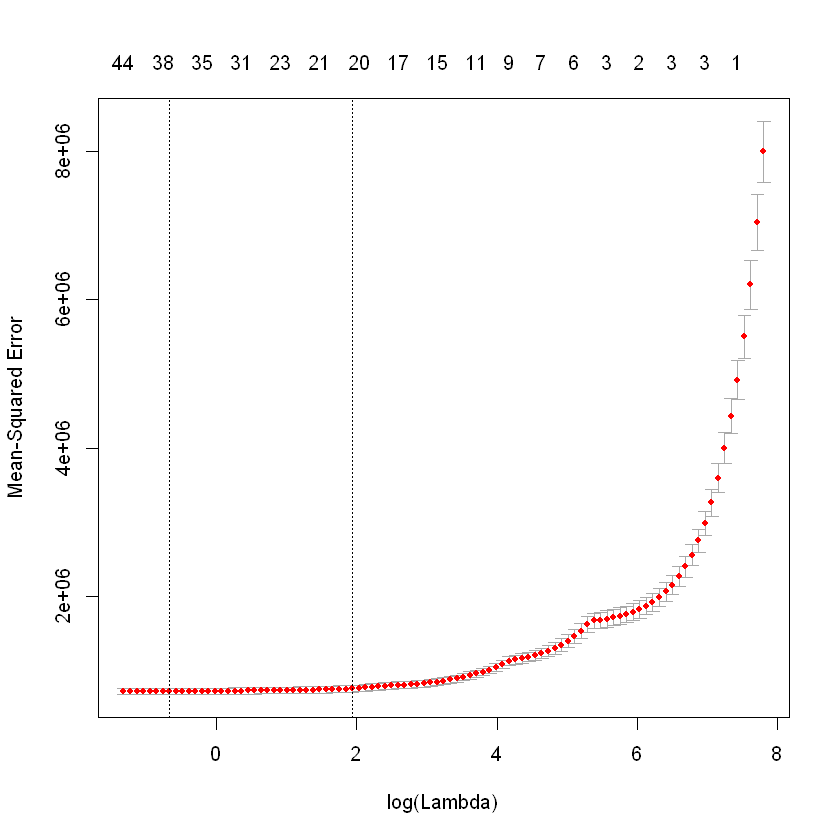

In [75]:
# Sample lamda plot for Hour 0
plot(wide_fit_0)
wide_fit_0$lambda.min
wide_fit_0$lambda.1se

In [64]:
# Fit lasso models
lasso_model_0 = glmnet(wide_tr_mat, wide_tr_ac_mat[,2], alpha = 1, family = "gaussian", lambda = wide_fit_0$lambda.1se)
lasso_model_1 = glmnet(wide_tr_mat, wide_tr_ac_mat[,3], alpha = 1, family = "gaussian", lambda = wide_fit_1$lambda.1se)
lasso_model_2 = glmnet(wide_tr_mat, wide_tr_ac_mat[,14], alpha = 1, family = "gaussian", lambda = wide_fit_2$lambda.1se)
lasso_model_3 = glmnet(wide_tr_mat, wide_tr_ac_mat[,19], alpha = 1, family = "gaussian", lambda = wide_fit_3$lambda.1se)
lasso_model_4 = glmnet(wide_tr_mat, wide_tr_ac_mat[,20], alpha = 1, family = "gaussian", lambda = wide_fit_4$lambda.1se)
lasso_model_5 = glmnet(wide_tr_mat, wide_tr_ac_mat[,21], alpha = 1, family = "gaussian", lambda = wide_fit_5$lambda.1se)
lasso_model_6 = glmnet(wide_tr_mat, wide_tr_ac_mat[,22], alpha = 1, family = "gaussian", lambda = wide_fit_6$lambda.1se)
lasso_model_7 = glmnet(wide_tr_mat, wide_tr_ac_mat[,23], alpha = 1, family = "gaussian", lambda = wide_fit_7$lambda.1se)
lasso_model_8 = glmnet(wide_tr_mat, wide_tr_ac_mat[,24], alpha = 1, family = "gaussian", lambda = wide_fit_8$lambda.1se)
lasso_model_9 = glmnet(wide_tr_mat, wide_tr_ac_mat[,25], alpha = 1, family = "gaussian", lambda = wide_fit_9$lambda.1se)
lasso_model_10 = glmnet(wide_tr_mat, wide_tr_ac_mat[,4], alpha = 1, family = "gaussian", lambda = wide_fit_10$lambda.1se)
lasso_model_11 = glmnet(wide_tr_mat, wide_tr_ac_mat[,5], alpha = 1, family = "gaussian", lambda = wide_fit_11$lambda.1se)
lasso_model_12 = glmnet(wide_tr_mat, wide_tr_ac_mat[,6], alpha = 1, family = "gaussian", lambda = wide_fit_12$lambda.1se)
lasso_model_13 = glmnet(wide_tr_mat, wide_tr_ac_mat[,7], alpha = 1, family = "gaussian", lambda = wide_fit_13$lambda.1se)
lasso_model_14 = glmnet(wide_tr_mat, wide_tr_ac_mat[,8], alpha = 1, family = "gaussian", lambda = wide_fit_14$lambda.1se)
lasso_model_15 = glmnet(wide_tr_mat, wide_tr_ac_mat[,9], alpha = 1, family = "gaussian", lambda = wide_fit_15$lambda.1se)
lasso_model_16 = glmnet(wide_tr_mat, wide_tr_ac_mat[,10], alpha = 1, family = "gaussian", lambda = wide_fit_16$lambda.1se)
lasso_model_17 = glmnet(wide_tr_mat, wide_tr_ac_mat[,11], alpha = 1, family = "gaussian", lambda = wide_fit_17$lambda.1se)
lasso_model_18 = glmnet(wide_tr_mat, wide_tr_ac_mat[,12], alpha = 1, family = "gaussian", lambda = wide_fit_18$lambda.1se)
lasso_model_19 = glmnet(wide_tr_mat, wide_tr_ac_mat[,13], alpha = 1, family = "gaussian", lambda = wide_fit_19$lambda.1se)
lasso_model_20 = glmnet(wide_tr_mat, wide_tr_ac_mat[,15], alpha = 1, family = "gaussian", lambda = wide_fit_20$lambda.1se)
lasso_model_21 = glmnet(wide_tr_mat, wide_tr_ac_mat[,16], alpha = 1, family = "gaussian", lambda = wide_fit_21$lambda.1se)
lasso_model_22 = glmnet(wide_tr_mat, wide_tr_ac_mat[,17], alpha = 1, family = "gaussian", lambda = wide_fit_22$lambda.1se)
lasso_model_23 = glmnet(wide_tr_mat, wide_tr_ac_mat[,18], alpha = 1, family = "gaussian", lambda = wide_fit_23$lambda.1se)

In [65]:
# Make predictions with lasso models and create wide format table with lasso predicted consumption
lasso_predicted = wide_pen_te_ac
lasso_predicted = lasso_predicted[, lasso_predicted_0 := predict.glmnet(lasso_model_0, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_1 := predict.glmnet(lasso_model_1, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_2 := predict.glmnet(lasso_model_2, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_3 := predict.glmnet(lasso_model_3, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_4 := predict.glmnet(lasso_model_4, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_5 := predict.glmnet(lasso_model_5, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_6 := predict.glmnet(lasso_model_6, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_7 := predict.glmnet(lasso_model_7, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_8 := predict.glmnet(lasso_model_8, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_9 := predict.glmnet(lasso_model_9, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_10 := predict.glmnet(lasso_model_10, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_11 := predict.glmnet(lasso_model_11, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_12 := predict.glmnet(lasso_model_12, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_13 := predict.glmnet(lasso_model_13, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_14 := predict.glmnet(lasso_model_14, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_15 := predict.glmnet(lasso_model_15, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_16 := predict.glmnet(lasso_model_16, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_17 := predict.glmnet(lasso_model_17, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_18 := predict.glmnet(lasso_model_18, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_19 := predict.glmnet(lasso_model_19, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_20 := predict.glmnet(lasso_model_20, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_21 := predict.glmnet(lasso_model_21, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_22 := predict.glmnet(lasso_model_22, wide_te_mat)]
lasso_predicted = lasso_predicted[, lasso_predicted_23 := predict.glmnet(lasso_model_23, wide_te_mat)]

In [66]:
# calculate APE for lasso predicted consumption
lasso_predicted = lasso_predicted[, APE_L0:=(abs(lasso_predicted$actual_0-lasso_predicted$lasso_predicted_0)/abs(lasso_predicted$actual_0))*100]
lasso_predicted = lasso_predicted[, APE_L1:=(abs(lasso_predicted$actual_1-lasso_predicted$lasso_predicted_1)/abs(lasso_predicted$actual_1))*100]
lasso_predicted = lasso_predicted[, APE_L2:=(abs(lasso_predicted$actual_2-lasso_predicted$lasso_predicted_2)/abs(lasso_predicted$actual_2))*100]
lasso_predicted = lasso_predicted[, APE_L3:=(abs(lasso_predicted$actual_3-lasso_predicted$lasso_predicted_3)/abs(lasso_predicted$actual_3))*100]
lasso_predicted = lasso_predicted[, APE_L4:=(abs(lasso_predicted$actual_4-lasso_predicted$lasso_predicted_4)/abs(lasso_predicted$actual_4))*100]
lasso_predicted = lasso_predicted[, APE_L5:=(abs(lasso_predicted$actual_5-lasso_predicted$lasso_predicted_5)/abs(lasso_predicted$actual_5))*100]
lasso_predicted = lasso_predicted[, APE_L6:=(abs(lasso_predicted$actual_6-lasso_predicted$lasso_predicted_6)/abs(lasso_predicted$actual_6))*100]
lasso_predicted = lasso_predicted[, APE_L7:=(abs(lasso_predicted$actual_7-lasso_predicted$lasso_predicted_7)/abs(lasso_predicted$actual_7))*100]
lasso_predicted = lasso_predicted[, APE_L8:=(abs(lasso_predicted$actual_8-lasso_predicted$lasso_predicted_8)/abs(lasso_predicted$actual_8))*100]
lasso_predicted = lasso_predicted[, APE_L9:=(abs(lasso_predicted$actual_9-lasso_predicted$lasso_predicted_9)/abs(lasso_predicted$actual_9))*100]
lasso_predicted = lasso_predicted[, APE_L10:=(abs(lasso_predicted$actual_10-lasso_predicted$lasso_predicted_10)/abs(lasso_predicted$actual_10))*100]
lasso_predicted = lasso_predicted[, APE_L11:=(abs(lasso_predicted$actual_11-lasso_predicted$lasso_predicted_11)/abs(lasso_predicted$actual_11))*100]
lasso_predicted = lasso_predicted[, APE_L12:=(abs(lasso_predicted$actual_12-lasso_predicted$lasso_predicted_12)/abs(lasso_predicted$actual_12))*100]
lasso_predicted = lasso_predicted[, APE_L13:=(abs(lasso_predicted$actual_13-lasso_predicted$lasso_predicted_13)/abs(lasso_predicted$actual_13))*100]
lasso_predicted = lasso_predicted[, APE_L14:=(abs(lasso_predicted$actual_14-lasso_predicted$lasso_predicted_14)/abs(lasso_predicted$actual_14))*100]
lasso_predicted = lasso_predicted[, APE_L15:=(abs(lasso_predicted$actual_15-lasso_predicted$lasso_predicted_15)/abs(lasso_predicted$actual_15))*100]
lasso_predicted = lasso_predicted[, APE_L16:=(abs(lasso_predicted$actual_16-lasso_predicted$lasso_predicted_16)/abs(lasso_predicted$actual_16))*100]
lasso_predicted = lasso_predicted[, APE_L17:=(abs(lasso_predicted$actual_17-lasso_predicted$lasso_predicted_17)/abs(lasso_predicted$actual_17))*100]
lasso_predicted = lasso_predicted[, APE_L18:=(abs(lasso_predicted$actual_18-lasso_predicted$lasso_predicted_18)/abs(lasso_predicted$actual_18))*100]
lasso_predicted = lasso_predicted[, APE_L19:=(abs(lasso_predicted$actual_19-lasso_predicted$lasso_predicted_19)/abs(lasso_predicted$actual_19))*100]
lasso_predicted = lasso_predicted[, APE_L20:=(abs(lasso_predicted$actual_20-lasso_predicted$lasso_predicted_20)/abs(lasso_predicted$actual_20))*100]
lasso_predicted = lasso_predicted[, APE_L21:=(abs(lasso_predicted$actual_21-lasso_predicted$lasso_predicted_21)/abs(lasso_predicted$actual_21))*100]
lasso_predicted = lasso_predicted[, APE_L22:=(abs(lasso_predicted$actual_22-lasso_predicted$lasso_predicted_22)/abs(lasso_predicted$actual_22))*100]
lasso_predicted = lasso_predicted[, APE_L23:=(abs(lasso_predicted$actual_23-lasso_predicted$lasso_predicted_23)/abs(lasso_predicted$actual_23))*100]


In [67]:
# calculate MAPE for lasso predicted consumption
lasso_MAPE_0 = mean(lasso_predicted$APE_L0)
lasso_MAPE_1 = mean(lasso_predicted$APE_L1)
lasso_MAPE_2 = mean(lasso_predicted$APE_L2)
lasso_MAPE_3 = mean(lasso_predicted$APE_L3)
lasso_MAPE_4 = mean(lasso_predicted$APE_L4)
lasso_MAPE_5 = mean(lasso_predicted$APE_L5)
lasso_MAPE_6 = mean(lasso_predicted$APE_L6)
lasso_MAPE_7 = mean(lasso_predicted$APE_L7)
lasso_MAPE_8 = mean(lasso_predicted$APE_L8)
lasso_MAPE_9 = mean(lasso_predicted$APE_L9)
lasso_MAPE_10 = mean(lasso_predicted$APE_L10)
lasso_MAPE_11 = mean(lasso_predicted$APE_L11)
lasso_MAPE_12 = mean(lasso_predicted$APE_L12)
lasso_MAPE_13 = mean(lasso_predicted$APE_L13)
lasso_MAPE_14 = mean(lasso_predicted$APE_L14)
lasso_MAPE_15 = mean(lasso_predicted$APE_L15)
lasso_MAPE_16 = mean(lasso_predicted$APE_L16)
lasso_MAPE_17 = mean(lasso_predicted$APE_L17)
lasso_MAPE_18 = mean(lasso_predicted$APE_L18)
lasso_MAPE_19 = mean(lasso_predicted$APE_L19)
lasso_MAPE_20 = mean(lasso_predicted$APE_L20)
lasso_MAPE_21 = mean(lasso_predicted$APE_L21)
lasso_MAPE_22 = mean(lasso_predicted$APE_L22)
lasso_MAPE_23 = mean(lasso_predicted$APE_L23)

In [69]:
summary(lasso_predicted[,50:73])

     APE_L0            APE_L1            APE_L2              APE_L3        
 Min.   :0.04351   Min.   :0.07943   Min.   : 0.004535   Min.   : 0.05888  
 1st Qu.:0.66156   1st Qu.:0.68368   1st Qu.: 0.896721   1st Qu.: 1.22786  
 Median :2.15869   Median :2.26281   Median : 2.381548   Median : 2.47044  
 Mean   :2.53259   Mean   :2.74669   Mean   : 3.087271   Mean   : 3.35774  
 3rd Qu.:3.70446   3rd Qu.:4.13637   3rd Qu.: 4.925308   3rd Qu.: 5.02178  
 Max.   :7.78928   Max.   :9.53377   Max.   :10.217785   Max.   :10.63005  
     APE_L4             APE_L5            APE_L6             APE_L7        
 Min.   : 0.04576   Min.   : 0.0522   Min.   : 0.06242   Min.   : 0.06844  
 1st Qu.: 0.95051   1st Qu.: 0.9867   1st Qu.: 1.76322   1st Qu.: 1.48796  
 Median : 2.56450   Median : 2.5155   Median : 3.29442   Median : 4.82729  
 Mean   : 3.25705   Mean   : 3.3982   Mean   : 4.65824   Mean   : 6.18536  
 3rd Qu.: 5.12947   3rd Qu.: 5.2169   3rd Qu.: 7.76812   3rd Qu.:10.87227  
 Max.   :11.

In [71]:
# Display summary statistics
summary(lasso_predicted[,50:73]) # for APE values

quantile_hour0=quantile(lasso_predicted$APE_L0, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour1=quantile(lasso_predicted$APE_L1, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour2=quantile(lasso_predicted$APE_L2, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour3=quantile(lasso_predicted$APE_L3, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour4=quantile(lasso_predicted$APE_L4, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour5=quantile(lasso_predicted$APE_L5, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour6=quantile(lasso_predicted$APE_L6, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour7=quantile(lasso_predicted$APE_L7, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour8=quantile(lasso_predicted$APE_L8, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour9=quantile(lasso_predicted$APE_L9, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour10=quantile(lasso_predicted$APE_L10, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour11=quantile(lasso_predicted$APE_L11, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour12=quantile(lasso_predicted$APE_L12, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour13=quantile(lasso_predicted$APE_L13, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour14=quantile(lasso_predicted$APE_L14, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour15=quantile(lasso_predicted$APE_L15, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour16=quantile(lasso_predicted$APE_L16, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour17=quantile(lasso_predicted$APE_L17, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour18=quantile(lasso_predicted$APE_L18, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour19=quantile(lasso_predicted$APE_L19, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour20=quantile(lasso_predicted$APE_L20, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour21=quantile(lasso_predicted$APE_L21, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour22=quantile(lasso_predicted$APE_L22, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_hour23=quantile(lasso_predicted$APE_L23, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))

q_all=cbind(quantile_hour0,
            quantile_hour1,
            quantile_hour2,
            quantile_hour3,
            quantile_hour4,
            quantile_hour5,
            quantile_hour6,
            quantile_hour7,
            quantile_hour8,
            quantile_hour9,
            quantile_hour10,
            quantile_hour11,
            quantile_hour12,
            quantile_hour13,
            quantile_hour14,
            quantile_hour15,
            quantile_hour16,
            quantile_hour17,
            quantile_hour18,
            quantile_hour19,
            quantile_hour20,
            quantile_hour21,
            quantile_hour22,
            quantile_hour23)

q_all

     APE_L0            APE_L1            APE_L2              APE_L3        
 Min.   :0.04351   Min.   :0.07943   Min.   : 0.004535   Min.   : 0.05888  
 1st Qu.:0.66156   1st Qu.:0.68368   1st Qu.: 0.896721   1st Qu.: 1.22786  
 Median :2.15869   Median :2.26281   Median : 2.381548   Median : 2.47044  
 Mean   :2.53259   Mean   :2.74669   Mean   : 3.087271   Mean   : 3.35774  
 3rd Qu.:3.70446   3rd Qu.:4.13637   3rd Qu.: 4.925308   3rd Qu.: 5.02178  
 Max.   :7.78928   Max.   :9.53377   Max.   :10.217785   Max.   :10.63005  
     APE_L4             APE_L5            APE_L6             APE_L7        
 Min.   : 0.04576   Min.   : 0.0522   Min.   : 0.06242   Min.   : 0.06844  
 1st Qu.: 0.95051   1st Qu.: 0.9867   1st Qu.: 1.76322   1st Qu.: 1.48796  
 Median : 2.56450   Median : 2.5155   Median : 3.29442   Median : 4.82729  
 Mean   : 3.25705   Mean   : 3.3982   Mean   : 4.65824   Mean   : 6.18536  
 3rd Qu.: 5.12947   3rd Qu.: 5.2169   3rd Qu.: 7.76812   3rd Qu.:10.87227  
 Max.   :11.

,quantile_hour0,quantile_hour1,quantile_hour2,quantile_hour3,quantile_hour4,quantile_hour5,quantile_hour6,quantile_hour7,quantile_hour8,quantile_hour9,...,quantile_hour14,quantile_hour15,quantile_hour16,quantile_hour17,quantile_hour18,quantile_hour19,quantile_hour20,quantile_hour21,quantile_hour22,quantile_hour23
10%,0.2719644,0.3879107,0.3768689,0.7053363,0.4382816,0.4914641,0.5412666,0.4348535,0.6691391,1.048124,...,1.454870,1.455814,1.168023,0.9576558,0.4116781,0.4749519,0.6254576,0.9333692,0.7863608,0.7199767
25%,0.6615615,0.6836807,0.8967210,1.2278636,0.9505063,0.9867080,1.7632200,1.4879593,2.6877950,3.597972,...,3.066753,2.560388,2.548446,2.3391369,2.4158143,1.8928709,1.5655268,1.4742220,1.4013785,1.6781458
50%,2.1586889,2.2628084,2.3815481,2.4704375,2.5644957,2.5155482,3.2944220,4.8272909,5.9802561,6.749055,...,6.395872,6.193847,6.294483,5.5324301,5.2746424,4.0686172,3.8450155,4.0330558,3.6880487,3.2204831
75%,3.7044601,4.1363668,4.9253075,5.0217833,5.1294728,5.2169164,7.7681243,10.8722651,13.4477816,14.019816,...,13.345462,12.968087,12.013610,10.5431644,9.2697695,7.6881686,6.5496372,6.7289437,6.4777159,5.8512902
90%,5.5148404,5.7535225,7.0850385,7.5047223,7.0022576,7.0402042,10.1658710,13.2453775,20.7789020,23.034984,...,19.763515,19.523728,16.708327,14.9667503,12.4095426,9.1984708,8.3728595,9.3490989,8.3148179,8.1671993


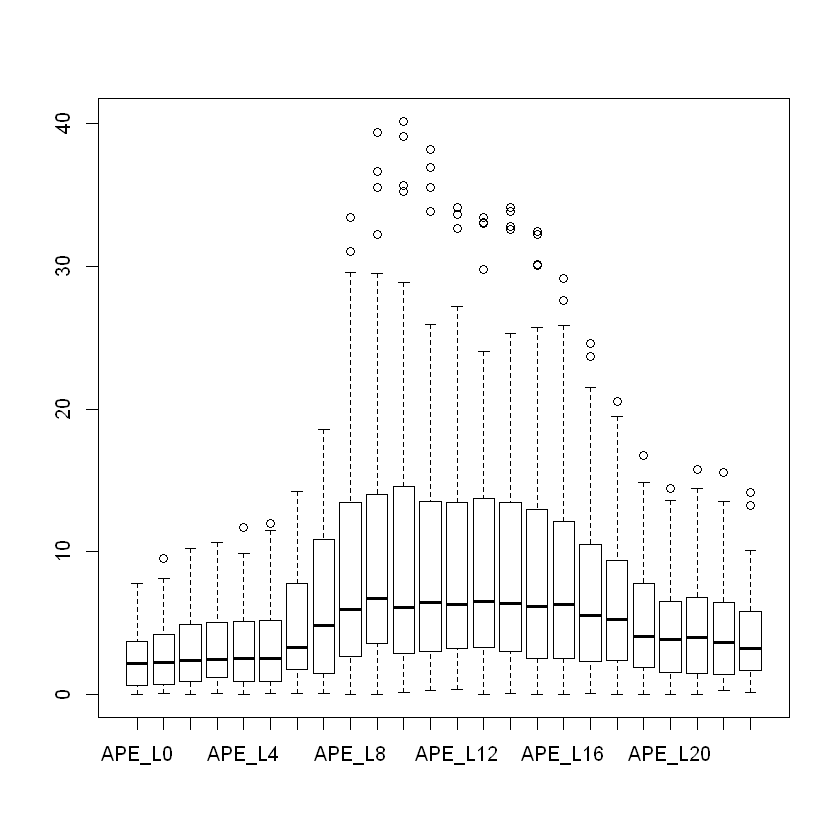

In [72]:
# Plot a boxplot for penalized APE
boxplot(lasso_predicted[,50:73])

# Comments

With the penalized regression models we obtain more consistent boxplots.
The error rates for the working hours are slightly more than the non-working hours.
This is probably due to the comsumption difference for the working hours during the weekdays and weekends.

Side note: We are aware of that there might be a better way of writing some parts but we keep our focus on the result rather than the scripting language.